In [1]:
from fenics import *
%matplotlib inline

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh (8 , 8 )
V = FunctionSpace ( mesh , "Lagrange", 1 )

# Define boundary condition
u0 = Function ( V )
bc = DirichletBC (V , u0 , "x[0] < DOLFIN_EPS || x[0] > 1.0 - DOLFIN_EPS")

INSTANT_CACHE_DIR is no longer used by dijitso. To set the cache directory for dijitso, set DIJITSO_CACHE_DIR.


In [3]:
u = TrialFunction ( V )
v = TestFunction ( V )
f = Expression ("10*exp ( -( pow(x[0] - 0.5, 2) + pow (x[1] - 0.5, 2)) / 0.02)", degree=1 )
g = Expression ("sin(5*x[0])", degree =1 )
a = inner ( grad ( u ) , grad ( v ) )*dx
L = f*v*dx + g*v*ds

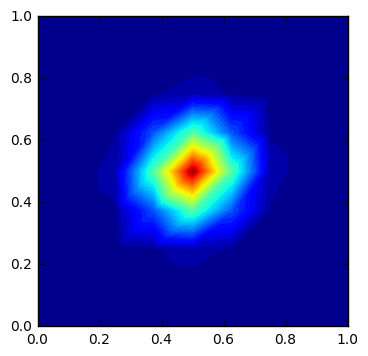

In [4]:
plot(project(f, V))

In [6]:
u = Function(V)
M = u*dx
tol = 1.0e-5

In [7]:
solver_parameters = {"error_control":
                        {"dual_variational_solver":
                            {"linear_solver": "cg"}}}
solve(a == L, u, bc, tol=tol, M=M,solver_parameters = solver_parameters)

<function dolfin.cpp.io.interactive>

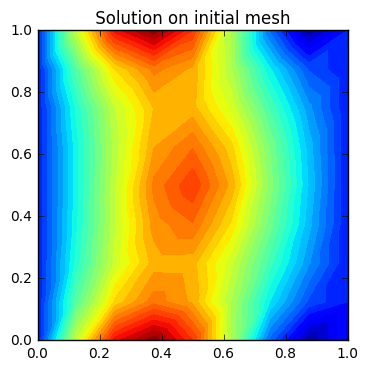

In [8]:
plot(u.root_node() , title =" Solution on initial mesh ")
interactive 

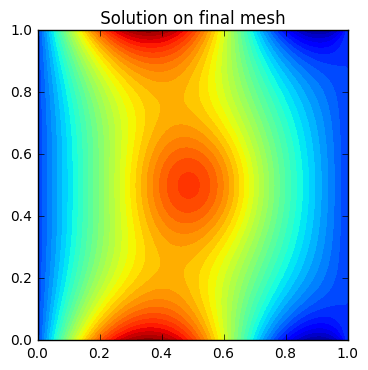

In [9]:
plot(u.leaf_node() , title =" Solution on final mesh ")
interactive()

In [10]:
file = File("u.pvd")
file << u.leaf_node()